### Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
from scipy.stats import zscore
!pip install plotly

### Reading the csv file


In [2]:
# Kindly note that the first column was unlabelled and it was labelled as Sno by opening the CSV file
av_df = pd.read_csv("avacado.csv")

### Check the top few records and the dimensions of the dataset

In [3]:
av_df.head()

,Sno,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
av_df.shape

(1517, 14)

In [5]:
av_df.tail()

,Sno,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,9/10/2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,2/10/2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


In [6]:
#Checking the datatypes
av_df.dtypes

Sno               int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
#Converting the date column into datetime type
av_df["Date"] = pd.to_datetime(av_df["Date"])
av_df.dtypes

Sno                      int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [8]:
av_df.head(2)

,Sno,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


### Doing the descriptive statistics to know what the data is telling us

In [9]:
av_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sno,1517.0,2.699539e+01,1.484829e+01,0.00,14.00,29.00,39.00,51.00
AveragePrice,1517.0,1.074990e+00,1.888912e-01,0.49,0.98,1.08,1.19,1.68
Total Volume,1517.0,1.601879e+06,4.433143e+06,38750.74,147469.99,402791.86,981975.08,44655461.51
4046,1517.0,6.464387e+05,1.947614e+06,467.72,20400.34,81751.17,377578.48,18933038.04
4225,1517.0,6.114375e+05,1.672906e+06,1783.77,41476.06,118664.89,485150.34,18956479.74
4770,1517.0,5.040550e+04,1.377812e+05,0.00,911.25,7688.17,29167.30,1381516.11
Total Bags,1517.0,2.935974e+05,7.579765e+05,3311.77,36206.89,73979.06,157609.68,6736304.04
Small Bags,1517.0,2.487736e+05,6.474765e+05,3311.77,29727.22,62375.69,146199.35,5893641.72
Large Bags,1517.0,4.264205e+04,1.182157e+05,0.00,540.74,5044.35,29267.67,1121076.47
XLarge Bags,1517.0,2.181771e+03,7.455712e+03,0.00,0.00,0.00,401.48,108072.79


In [10]:
# Here, we can see that the first column is not telling us anything. So, we will go ahead and drop it
av_df=av_df.drop("Sno",axis=1)

In [11]:
# Let us count the number of conventional and organic Avacado sales
av_df["type"].value_counts()
# So, we have only the conventional types available here

conventional    1517
Name: type, dtype: int64

In [12]:
# Here, we can have a look at the number of occurances of each region
av_df["region"].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
DallasFtWorth          17
Roanoke                17
MiamiFtLaude

### Checking for NULL values

In [13]:
av_df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [14]:
av_df["year"].unique()
# We have the data of the years 2015 and 2016

array([2015, 2016], dtype=int64)

In [15]:
av_df["year"].value_counts()
# The majority of data that we have is from the year 2015

2015    1270
2016     247
Name: year, dtype: int64

### Adding month column

In [16]:
av_df['Month']=av_df['Date'].apply(lambda x:x.month)


In [17]:
#Let's see how our dataframe looks like now
av_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


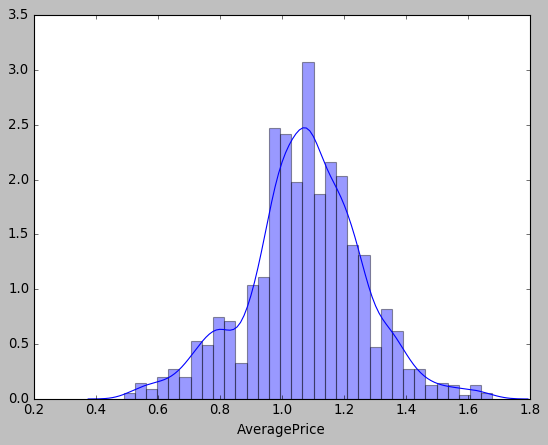

In [18]:
av = sns.distplot(av_df["AveragePrice"])
#Here, we have a normally distributed average price curve.

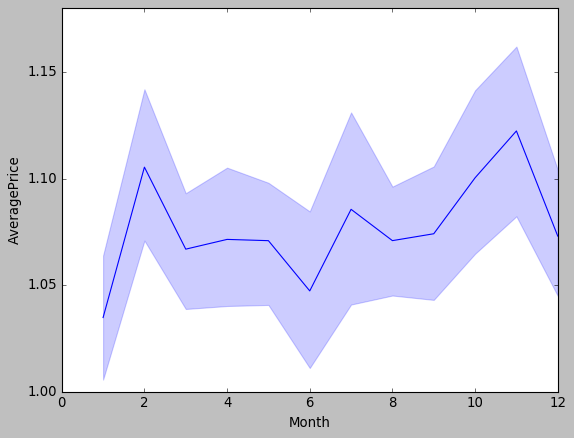

In [19]:
#Now, let's see how our average price is changing on monthly basis
sns.lineplot(x="Month", y="AveragePrice", data=av_df)

### Correlation Check

In [20]:
av_df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.060642
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.055212
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.053007
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.058429
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.055079
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.047747
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.048978
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.039242
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.021452
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.013144


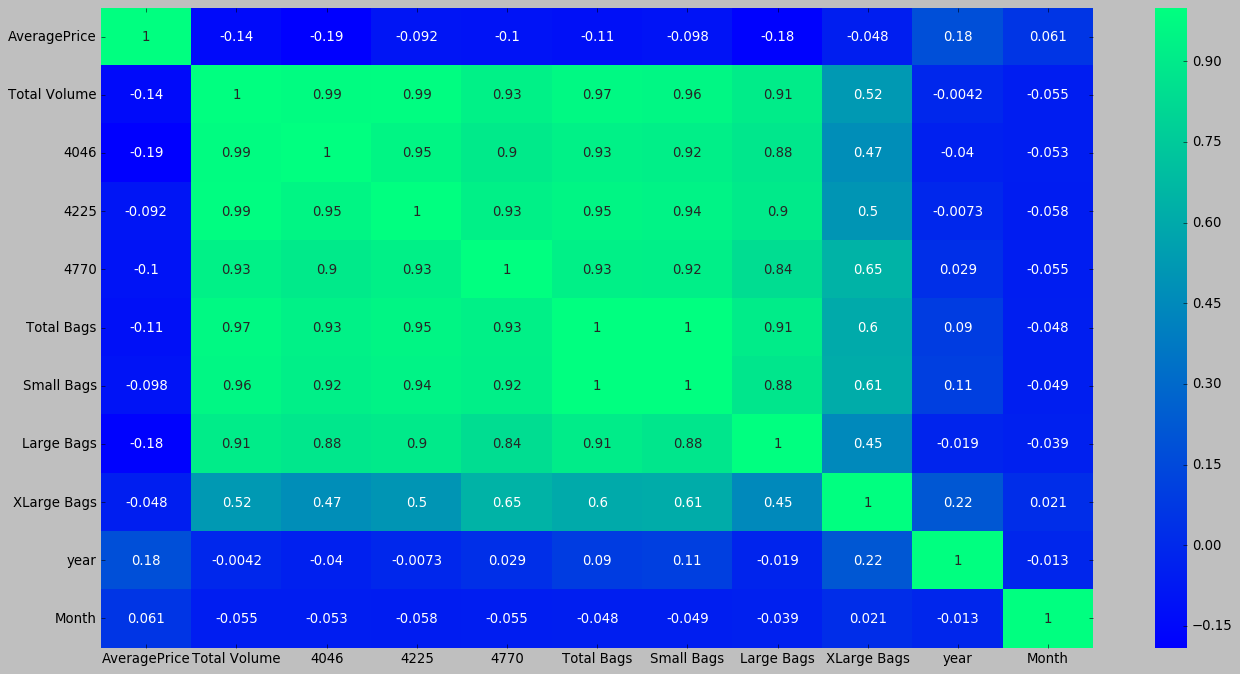

In [21]:
#Let's see this on a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(av_df.corr(),annot=True, cmap='winter')

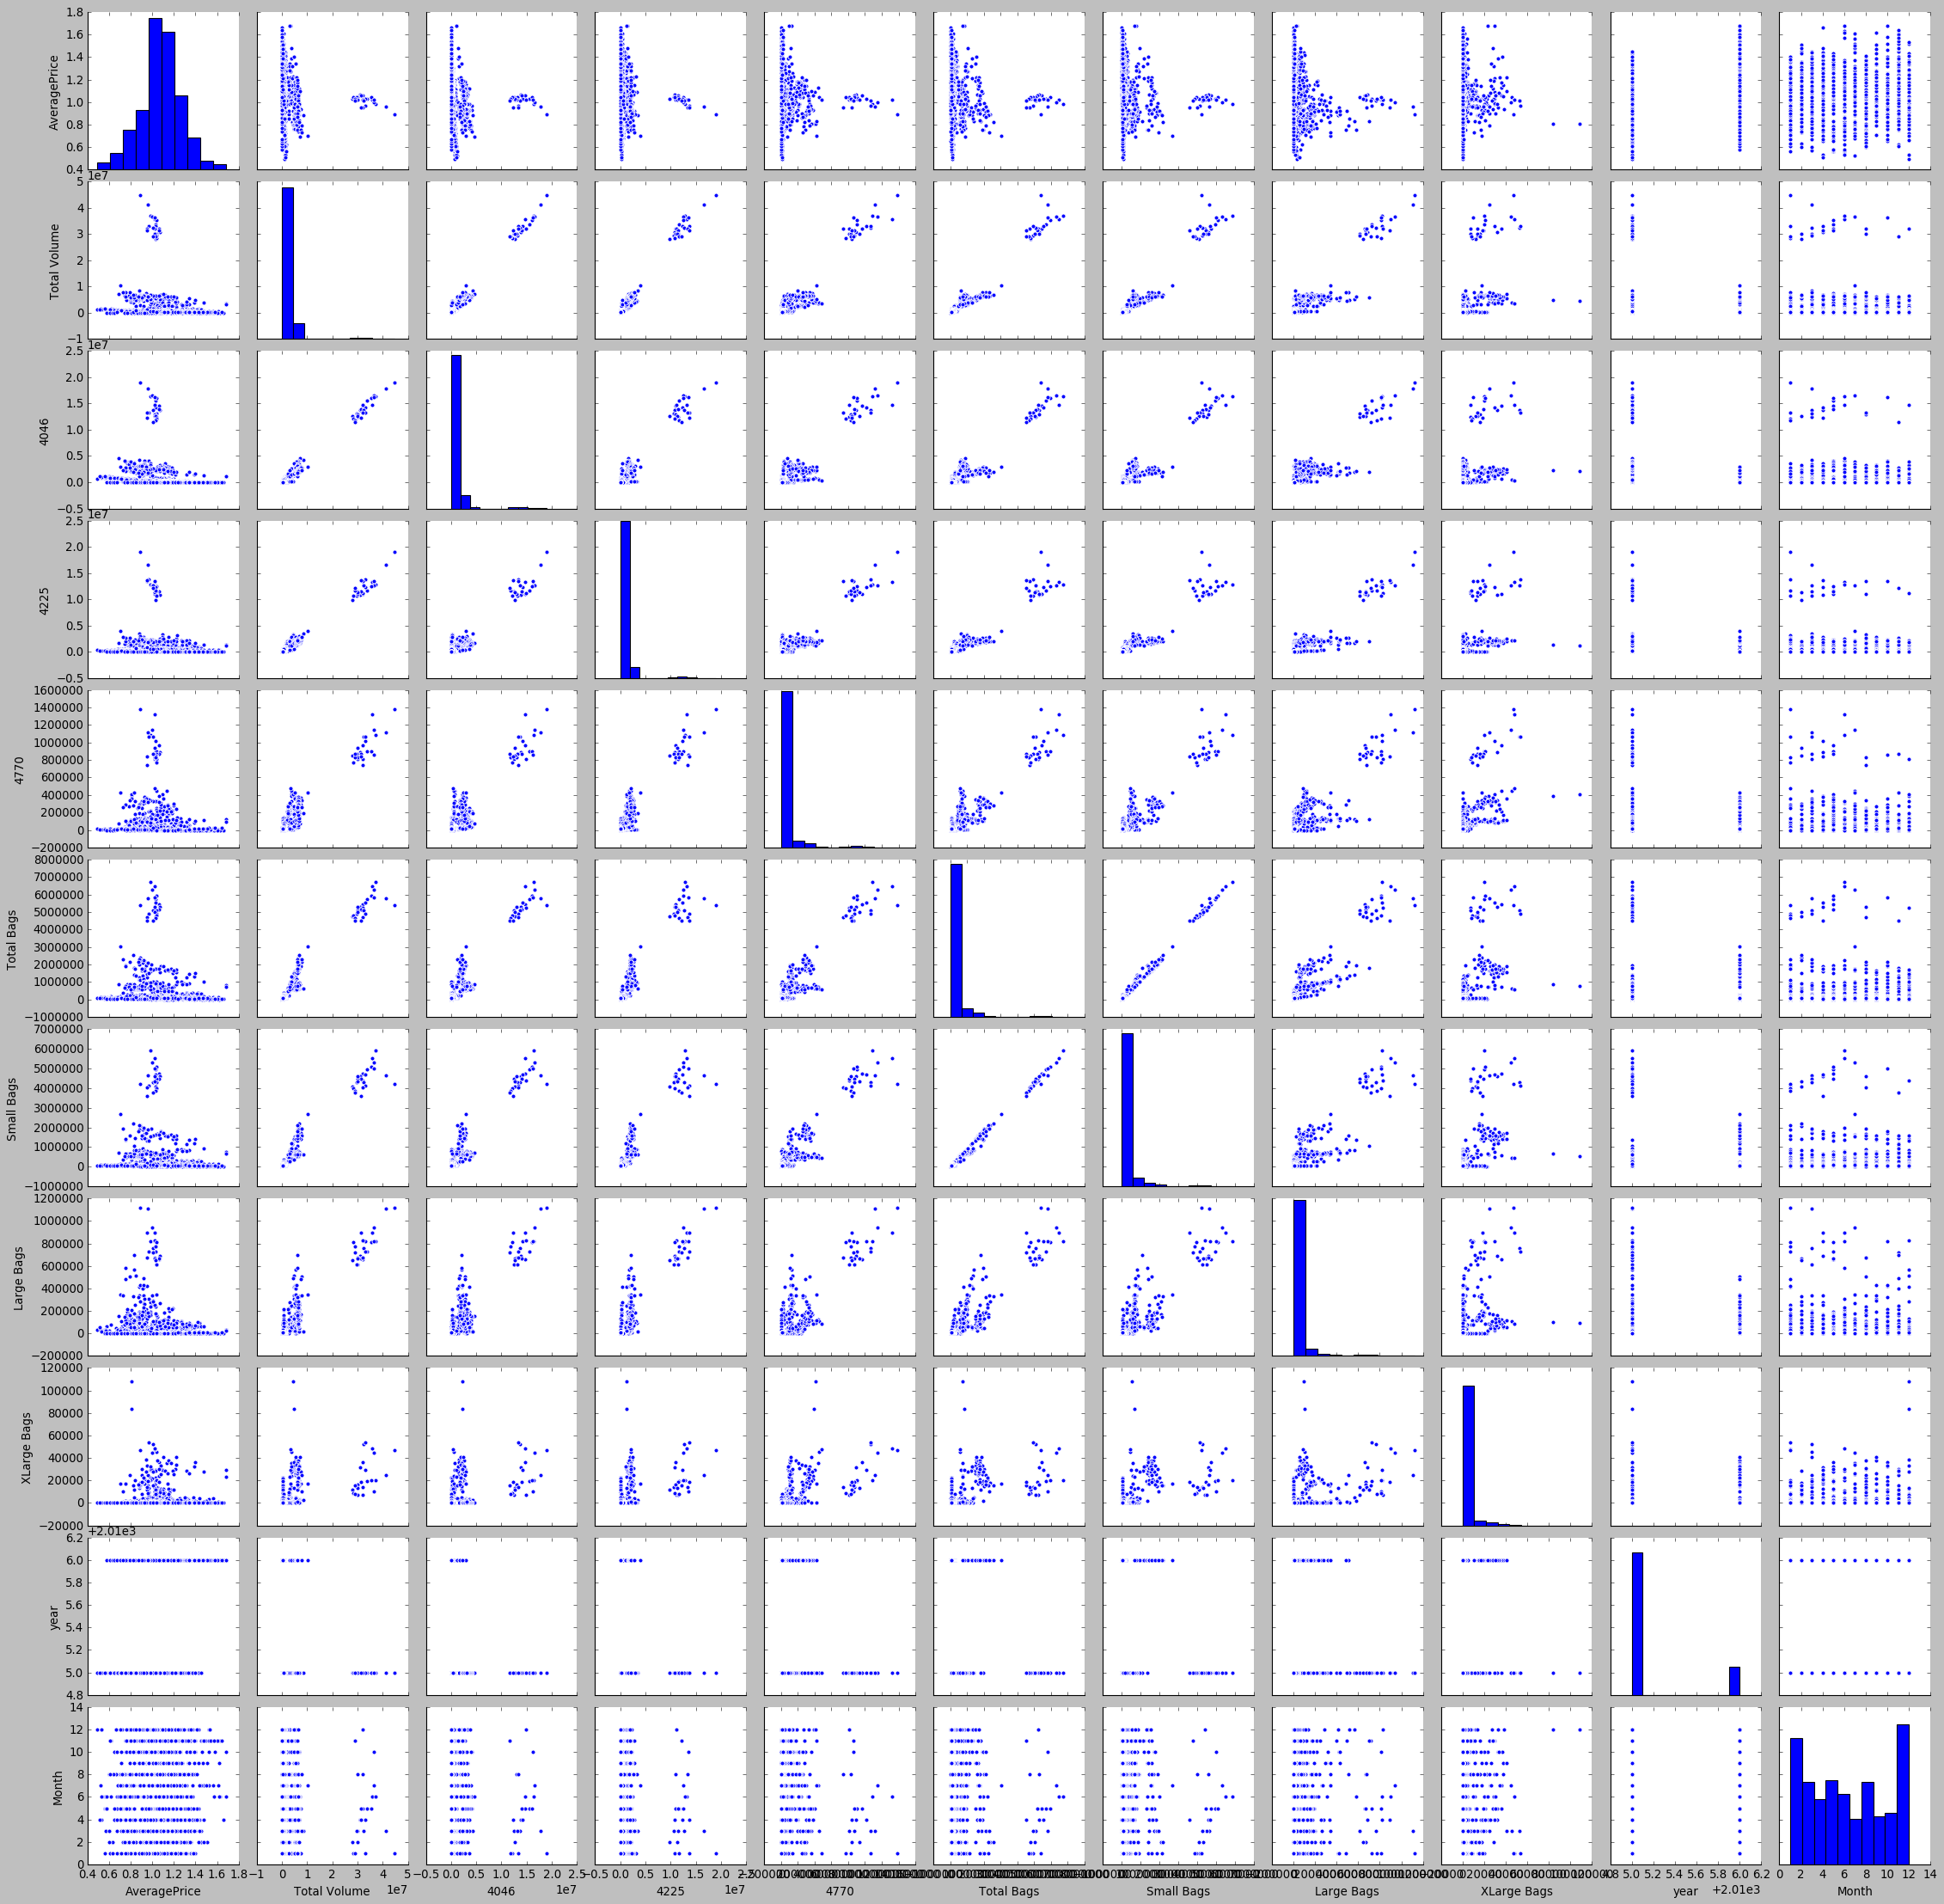

In [22]:
sns.pairplot(av_df)

From the heatmap and pairplot, it is evident that some of our features are correlated with each other, which will result in multicollinearity. Also, a few features are not correlated with Average Price, which is our target variable for the Regression model. This might have an impact on the final outcome.


### Feature Engineering

In [23]:
#We have extracted month from date column, so we can drop that
av_df.drop(["Date"], inplace=True, axis=1)

In [24]:
av_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [25]:
av_df['type'].unique()

array(['conventional'], dtype=object)

In [26]:
# Since we have only one type of avacado and the organic types are not present in the dataset, we can drop this column
av_df.drop(["type"], inplace=True, axis=1)
av_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11


In [27]:
#Also, year is not going to play a very important role in our analysis and its presence might skew our results. So, we should drop it as well
av_df.drop(["year"], inplace=True, axis=1)

In [28]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
av_df1 = pd.get_dummies(av_df, columns=['region'])
#We are preserving av_df for further analysis

In [29]:
#We also need to encode months as this is also categorical data
av_df1 = pd.get_dummies(av_df1, columns=['Month'])

In [30]:
av_df1.head()
#After one hot encoding, we have a total of 72 columns with us

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region_Albany,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,...,0,0,0,1,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,...,0,0,0,0,0,0,0,0,1,0


## Regression

### Seperating the input and output variables


In [31]:
df_x = av_df1.drop(columns=["AveragePrice"])
y = av_df1[["AveragePrice"]]

### Scaling the input variable

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x,columns=df_x.columns)

### Splitting the data

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=55,test_size=0.20)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("Max R2 Score corresponding to", final_r_state,"is",max_r_score)

In [34]:
print(x_train.shape,'\t',x_test.shape)

(1213, 71) 	 (304, 71)


In [35]:
print(y_train.shape,'\t',y_test.shape)

(1213, 1) 	 (304, 1)


In [36]:
#Importing our models Library
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Errors Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [37]:
#Using algorithms via for loop
import warnings
warnings.filterwarnings('ignore')

#RMSE Scores (Train & Test)
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(), Lasso(), Ridge(), ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('train_score of',m,'is',m.score(x_train,y_train))
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    print('Error_train:')
    print('Mean absolute error_train: ',mean_absolute_error(y_train,pred_train))
    print('Mean squared error_train: ',mean_squared_error(y_train,pred_train))
    print('Root mean squared error_train: ',np.sqrt(mean_squared_error(y_train,pred_train)))
    print('r2 score_train: ',r2_score(y_train,pred_train))
    print('***********************************************************************')
    print('\n')
    print('test_score of',m,'is',m.score(x_test,y_test))
    print('Error_test:')
    print('Mean absolute error_test: ',mean_absolute_error(y_test,pred_test))
    print('Mean squared error_test: ',mean_squared_error(y_test,pred_test))
    print('Root mean squared error_test: ',np.sqrt(mean_squared_error(y_test,pred_test)))
    print('r2 score_test: ',r2_score(y_test,pred_test))
    print('***********************************************************************')
    print('\n')

train_score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 0.6809003995573676
Error_train:
Mean absolute error_train:  0.0808587031944017
Mean squared error_train:  0.01121303966900538
Root mean squared error_train:  0.10589164116683328
r2 score_train:  0.6809003995573676
***********************************************************************


test_score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 0.6562816528820501
Error_test:
Mean absolute error_test:  0.08382481577321112
Mean squared error_test:  0.012899652197332249
Root mean squared error_test:  0.11357663578981483
r2 score_test:  0.6562816528820501
***********************************************************************


train_score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
           

**Comparing the RMSE scores of Training & Testing Data, we clearly see that scores are similar for following Models: 'LINEAR REGRESSION', 'KNN', 'SVR','LASSO', 'RIDGE' & 'ELASTICNET'. But Model Score or R square for Lasso & ElasticNet is close to 0 which means these are not good performing models. So, out of given models Linear Regression, KNN, SVR & Ridge are the best for predctions & let us see their Cross Validation Scores below as well** 

In [38]:
#Cross validate the models Code_r2 as scoring parameter:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(), Lasso(), Ridge(), ElasticNet()]
for m in model:
    train_data_score=cross_val_score(m,x_train,y_train,cv=7,scoring='r2')
    test_data_score=cross_val_score(m,x_test,y_test,cv=7,scoring='r2')
    print('train_data_score of',m,'is: ')
    print('Score: ',train_data_score)
    print('Mean Score:',train_data_score.mean())
    print('Standard Deviation',train_data_score.std())
    print('**********************************************************')
    print('test_data_score of',m,'is: ')
    print('Score: ',test_data_score)
    print('Mean Score:',test_data_score.mean())
    print('Standard Deviation',test_data_score.std())
    print('**********************************************************')
    print('\n')

train_data_score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 
Score:  [0.67682256 0.65315132 0.64306404 0.71603507 0.53557887 0.58270204
 0.63179376]
Mean Score: 0.6341639510634806
Standard Deviation 0.05520783322539057
**********************************************************
test_data_score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 
Score:  [ 1.60151410e-01  4.61232007e-01  6.61617758e-01 -8.94422167e+24
  5.38600766e-01  6.84316232e-01 -3.90167862e+25]
Mean Score: -6.851572549711571e+24
Standard Deviation 1.3489151091074693e+25
**********************************************************


train_data_score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      mi

In [39]:
#Cross validate the models Code_CV Scores for Model as a whole without mentioning any scoring parameter:
#Default scoring is R2 or Score itself as done above
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(), Lasso(), Ridge(), ElasticNet()]
for m in model:
    train_data_score=cross_val_score(m,x_train,y_train,cv=7)
    test_data_score=cross_val_score(m,x_test,y_test,cv=7)
    print('train_data_score of',m,'is: ')
    print('Score: ',train_data_score)
    print('Mean Score:',train_data_score.mean())
    print('Standard Deviation',train_data_score.std())
    print('**********************************************************')
    print('test_data_score of',m,'is: ')
    print('Score: ',test_data_score)
    print('Mean Score:',test_data_score.mean())
    print('Standard Deviation',test_data_score.std())
    print('**********************************************************')
    print('\n')

train_data_score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 
Score:  [0.67682256 0.65315132 0.64306404 0.71603507 0.53557887 0.58270204
 0.63179376]
Mean Score: 0.6341639510634807
Standard Deviation 0.05520783322539059
**********************************************************
test_data_score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 
Score:  [ 1.60151410e-01  4.61232007e-01  6.61617758e-01 -8.94422167e+24
  5.38600766e-01  6.84316232e-01 -3.90167862e+25]
Mean Score: -6.851572549711571e+24
Standard Deviation 1.3489151091074693e+25
**********************************************************


train_data_score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      mi

**After 7 fold cross validation, scores both on train and test data set respectively for all 7 folds are almost same for models 'SVR' & 'RIDGE', hence these are the most valid models for future predictions** 

### Hyperparameter Tuning

In [41]:
# Ridge method is giving the best results, so finding the best Hyperparameters using Gridsearch CV
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [46]:
#using Ridge Model with best results
ridge=Ridge(alpha=1, random_state=42)
ridge.fit(x_train,y_train)
print('Score',ridge.score(x_train,y_train))
predrd=ridge.predict(x_test)
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,predrd))
print('Mean squared error: ',mean_squared_error(y_test,predrd))
print('Root mean squared error: ',np.sqrt(mean_squared_error(y_test,predrd)))
print('r2 score: ',r2_score(y_test,predrd))

Score 0.680857544175306


Mean absolute error:  0.08344683193318406
Mean squared error:  0.012747207717724052
Root mean squared error:  0.11290353279558639
r2 score:  0.6603436201162536


In [47]:
#Saving our model
from sklearn.externals import joblib
joblib.dump(model,'Avacado_proj.csv')

['Avacado_proj.csv']